# TransUNet Inference Demo

This notebook demonstrates the capabilities of the trained TransUNet model by visualizing segmentation results on test images.

It will:
1.  Load the trained model (`best_model.pth`).
2.  Load samples from the test dataset.
3.  Run inference to generate predictions.
4.  Visualize the **Input Image**, **Ground Truth**, and **Model Prediction** side-by-side.

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from transunet import TransUNet
from train import SynapseDataset

# Configuration
DATA_DIR = r"C:\Users\yuvar\Projects\Computer Vision\Project\data\preprocessed"
MODEL_PATH = r"C:\Users\yuvar\Projects\Computer Vision\Project\models\best_model.pth"
NUM_CLASSES = 14
IMG_SIZE = 224
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"Using device: {DEVICE}")

Using device: cuda


## 1. Load Model and Dataset

In [2]:
# Load Dataset
test_dataset = SynapseDataset(DATA_DIR, split="test")
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True) # Shuffle to see random samples

# Load Model
model = TransUNet(num_classes=NUM_CLASSES, img_dim=IMG_SIZE).to(DEVICE)

if os.path.exists(MODEL_PATH):
    model.load_state_dict(torch.load(MODEL_PATH, map_location=DEVICE))
    print("Model loaded successfully.")
else:
    print("Error: Model file not found. Please train the model first.")
    
model.eval();

Loaded 1454 samples for test


c:\Users\yuvar\anaconda3\envs\cvlab\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\yuvar\anaconda3\envs\cvlab\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Model loaded successfully.


## 2. Visualization Helper

In [3]:
def visualize_prediction(model, dataset, num_samples=5):
    model.eval()
    indices = np.random.choice(len(dataset), num_samples, replace=False)
    
    for idx in indices:
        sample = dataset[idx]
        image = sample['image'].unsqueeze(0).to(DEVICE)
        label = sample['label'].numpy()
        
        with torch.no_grad():
            output = model(image)
            pred = torch.argmax(torch.softmax(output, dim=1), dim=1).cpu().numpy()[0]
            
        # Plot
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        
        # Input Image (Take first channel)
        img_show = sample['image'][0].numpy()
        axes[0].imshow(img_show, cmap='gray')
        axes[0].set_title("Input Image")
        axes[0].axis('off')
        
        # Ground Truth
        axes[1].imshow(label, cmap='jet', interpolation='nearest')
        axes[1].set_title("Ground Truth")
        axes[1].axis('off')
        
        # Prediction
        axes[2].imshow(pred, cmap='jet', interpolation='nearest')
        axes[2].set_title("Model Prediction")
        axes[2].axis('off')
        
        plt.show()

## 3. Run Visualization

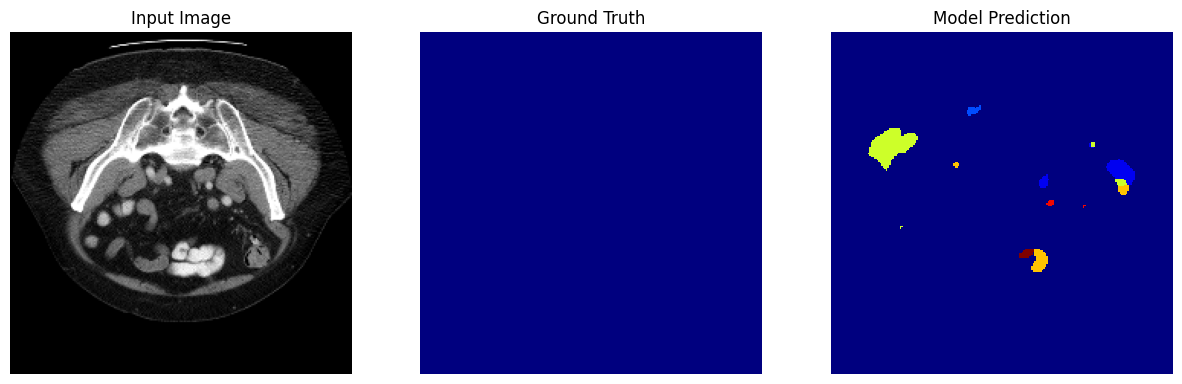

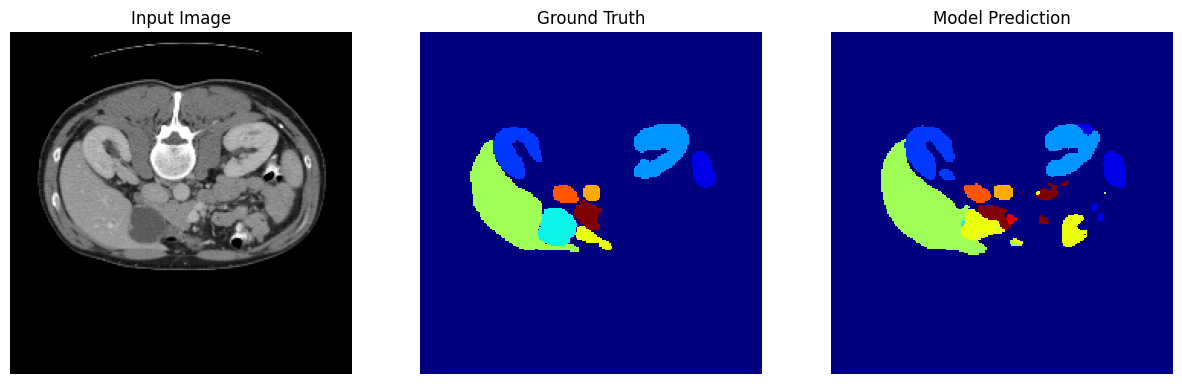

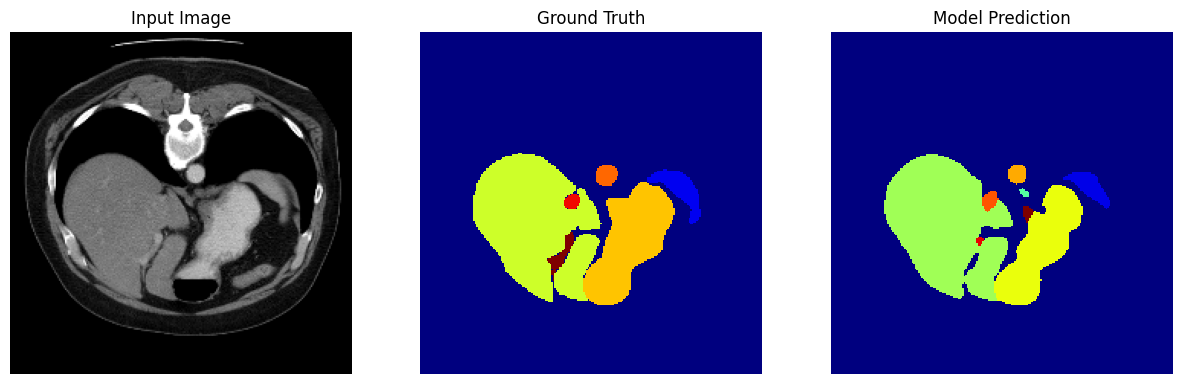

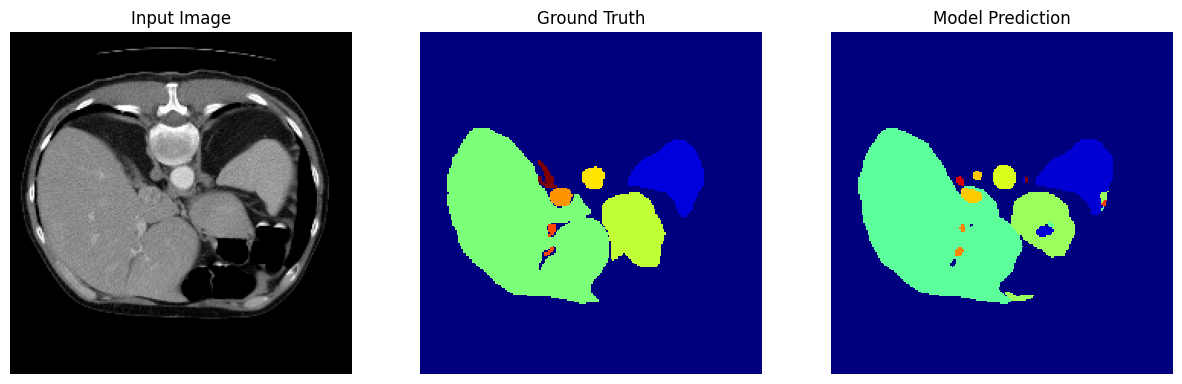

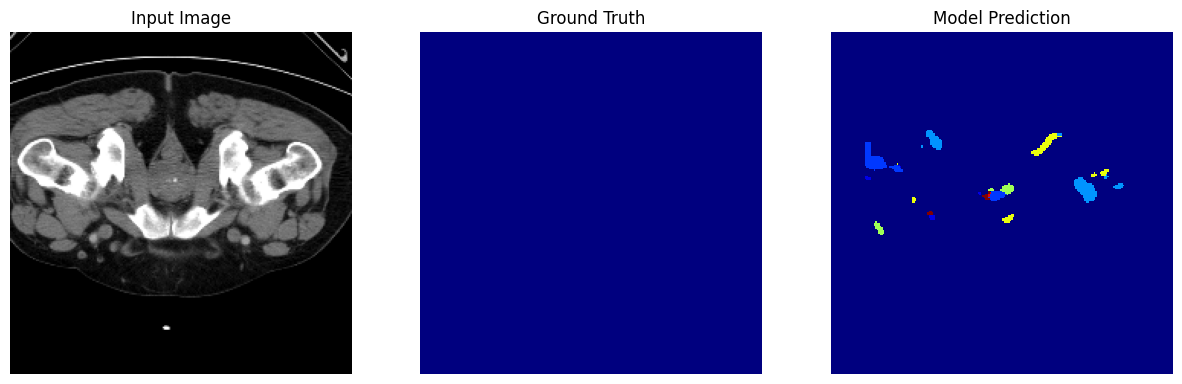

In [19]:
visualize_prediction(model, test_dataset, num_samples=5)